In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_table('webtr.csv',sep='\t',header=None)

In [3]:
df.columns=['hrs','hits']

In [7]:
df.head()

,hrs,hits
0,1,2272.0
1,2,NaN
2,3,1386.0
3,4,1365.0
4,5,1488.0


In [10]:
df.isnull().sum()

hrs     0
hits    8
dtype: int64

In [5]:
dff=df.copy()

In [6]:
dff=dff.dropna(axis=0)

In [7]:
dff.isnull().sum()

hrs     0
hits    0
dtype: int64

In [8]:
len(dff.hits)

735

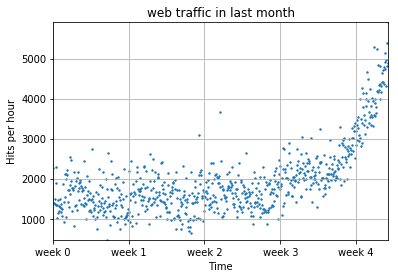

In [9]:
plt.scatter(x=dff.hrs,y=dff.hits,s=2)
plt.title('web traffic in last month')
plt.xlabel("Time")
plt.ylabel("Hits per hour")
_=plt.xticks([w*7*24 for w in range(6)],['week %i'%w for w in range(6)])
plt.grid()
plt.autoscale(tight=True)
plt.show()

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
X=np.array(dff.hrs)
X=X.reshape(-1,1)
y=list(dff.hits)
lr=LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
pred=lr.predict(X)

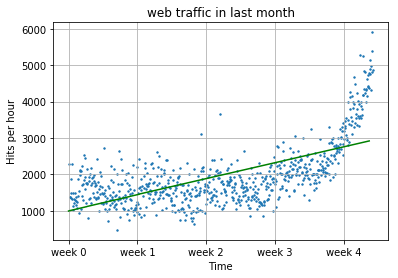

In [12]:
plt.scatter(x=dff.hrs,y=dff.hits,s=2)
plt.title('web traffic in last month')
plt.xlabel("Time")
plt.ylabel("Hits per hour")
_=plt.xticks([w*7*24 for w in range(6)],['week %i'%w for w in range(6)])
plt.grid()
plt.autoscale(tight=False)
plt.plot(pred,c='g',alpha=1)
plt.show()

In [21]:
def error(pre,yy):
    return np.sum(np.array([pre-yy])**2)

In [22]:
error(pred,y)

317389767.339778

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
X=pf.fit_transform(X)
lr.fit(X,y)

In [ ]:
pred2=lr.predict(X)

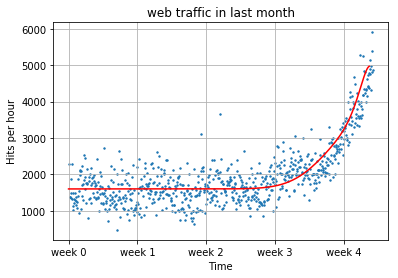

129624004.84788418

In [26]:
plt.scatter(x=dff.hrs,y=dff.hits,s=2)
plt.title('web traffic in last month')
plt.xlabel("Time")
plt.ylabel("Hits per hour")
_=plt.xticks([w*7*24 for w in range(6)],['week %i'%w for w in range(6)])
plt.grid()
plt.autoscale(tight=False)
plt.plot(pred2,c='r',alpha=1)
plt.show()
error(pred2,y)